[0.97087035]
98.7147181382184


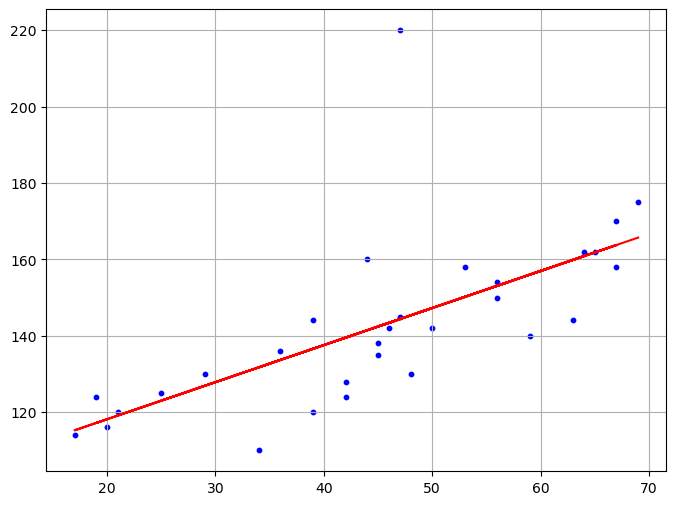

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./blood-pressure.csv')
x = df['Age'].values
x = x[:,np.newaxis]
y = df['Blood_Pressure'].values

reg = LinearRegression().fit(x, y)
print(reg.coef_) #w
print(reg.intercept_) #b

fig = plt.figure(figsize=(8,6))
plt.scatter(x,y, s=10, color='b')

y_pred = [reg.coef_*i + reg.intercept_ for i in x]
plt.plot(x, y_pred, 'r') #line of best fit

plt.grid()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y,y_pred))
mae = mean_absolute_error(y,y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y,y_pred)

print('rmse=', rmse)
print('mae=', mae)
print('mape=', mape)
print('r2 score=', r2)

rmse= 16.7266693052792
mae= 9.541101239615275
mape= 0.06339127977818437
r2 score= 0.43239473192759537


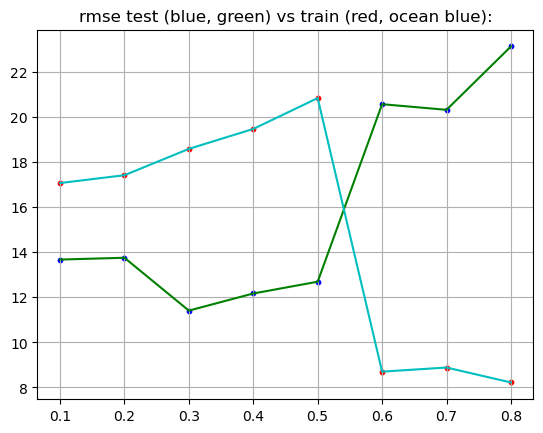

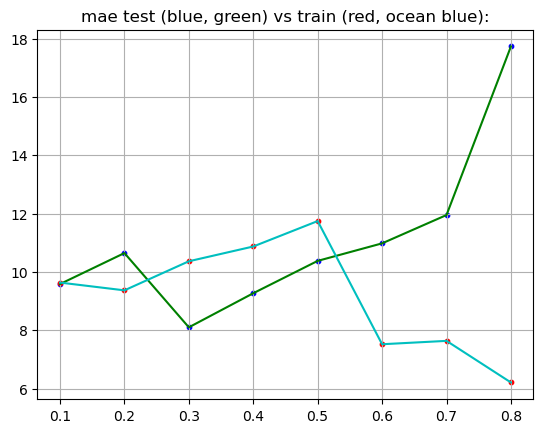

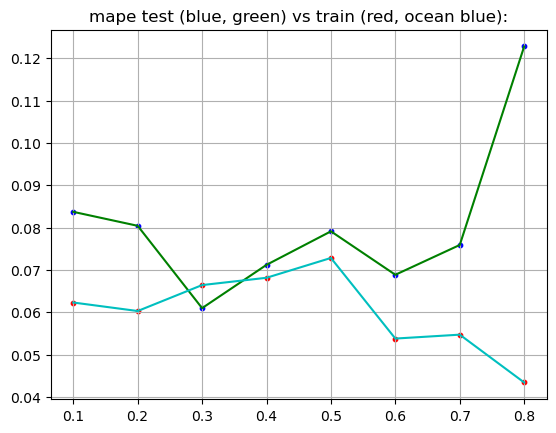

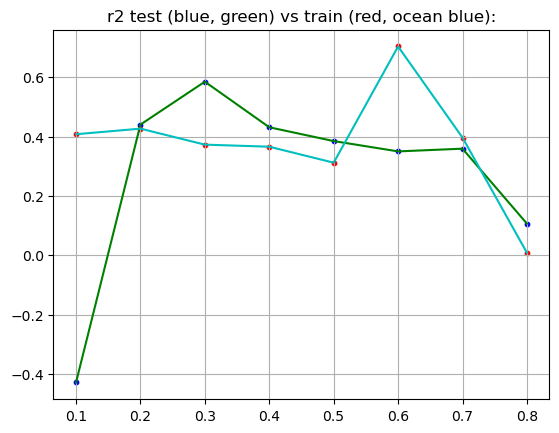

Until 0.5 test size, the models are properly fitted as the errors are linear
in validation set and do not experience abrupt changes in training set.
However, when the test size increases after 0.5, the validation set error
starts to behave erratically, which means that test sizes up to 0.5 are acceptable
and do not contain overfitting. The best test size seems to be 0.3 as it has best rmse, mae, mape and r^2


In [20]:
from sklearn.model_selection import train_test_split

def pred(a, b, c, d):
    train = LinearRegression().fit(c, d)
    #b_pred = [test.coef_*i + test.intercept_ for i in a]
    #d_pred = [train.coef_*i + train.intercept_ for i in c]
    b_pred = train.predict(a)
    d_pred = train.predict(c)

    rmse = np.sqrt(mean_squared_error(b,b_pred))
    mae = mean_absolute_error(b,b_pred)
    mape = mean_absolute_percentage_error(b, b_pred)
    r2 = r2_score(b,b_pred)

    rmse1 = np.sqrt(mean_squared_error(d,d_pred))
    mae1 = mean_absolute_error(d,d_pred)
    mape1 = mean_absolute_percentage_error(d, d_pred)
    r21 = r2_score(d,d_pred)

    return rmse, mae, mape, r2, rmse1, mae1, mape1, r21

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)
res1 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
res2 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
res3 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)
res4 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 0)
res5 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state = 0)
res6 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state = 0)
res7 = pred( x_test, y_test, x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state = 0)
res8 = pred( x_test, y_test, x_train, y_train)

arr = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
label = np.array(["rmse test (blue, green) vs train (red, ocean blue):", "mae test (blue, green) vs train (red, ocean blue):", "mape test (blue, green) vs train (red, ocean blue):", "r2 test (blue, green) vs train (red, ocean blue):"])
for i in range (4):
    plt.title(label[i])

    arr1 = np.array([res1[i], res2[i], res3[i], res4[i], res5[i], res6[i], res7[i], res8[i]])
    arr2 = np.array([res1[i+4], res2[i+4], res3[i+4], res4[i+4], res5[i+4], res6[i+4], res7[i+4], res8[i+4]])
    plt.scatter(arr, arr1, s=10, color='b')
    plt.plot(arr, arr1, 'g') 

    plt.scatter(arr, arr2, s=10, color='r')
    plt.plot(arr, arr2, 'c') 

    plt.grid()
    plt.show()

print("Until 0.5 test size, the models are properly fitted as the errors are linear\nin validation set and do not experience abrupt changes in training set.\n" +
        "However, when the test size increases after 0.5, the validation set error\nstarts to behave erratically, which means that test sizes up to 0.5 are acceptable\n" +
        "and do not contain overfitting. The best test size seems to be 0.3 as it has best rmse, mae, mape and r^2")





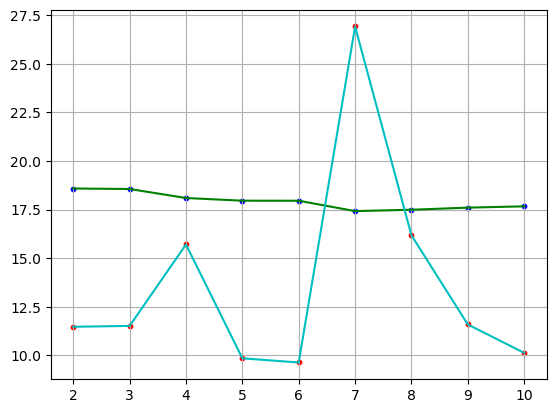

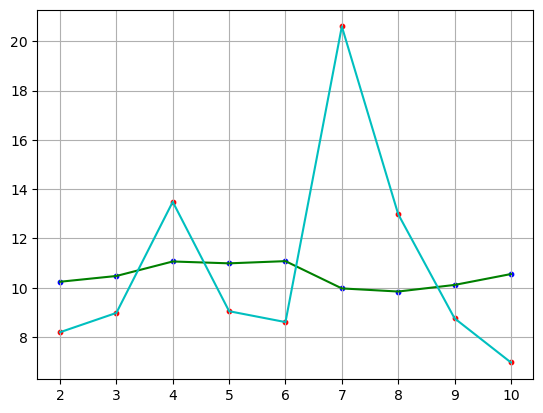

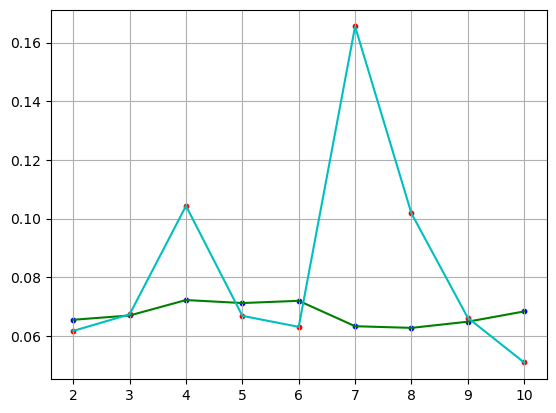

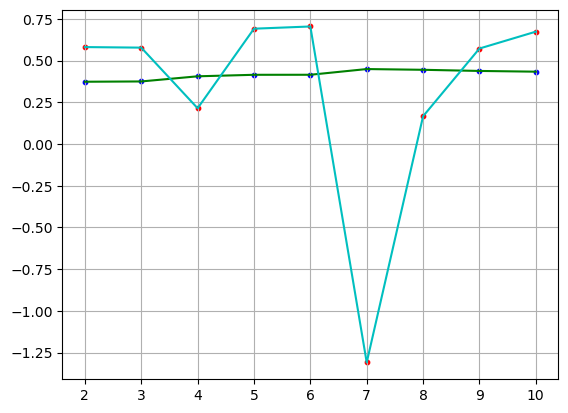

After the second degree polynomial, the errors become unpredictable, as the validation set
error graphs experience abrupt erroneous scatter of their points before suddenly
becoming linear again. The safest and most efficient polynomial degree to take is 2nd.


In [43]:
from sklearn.preprocessing import PolynomialFeatures

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []

for i in range (2, 11):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

    x_train = x_train[:np.newaxis]
    x_test = x_test[:np.newaxis]
    poly= PolynomialFeatures(degree=i)
    x_test_poly = poly.fit_transform(x_test)
    x_train_poly = poly.fit_transform(x_train)

    clf = LinearRegression().fit(x_train_poly, y_train)
    y_train_pred = clf.predict(x_train_poly)
    y_test_pred = clf.predict(x_test_poly)

    rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
    mae = mean_absolute_error(y_train,y_train_pred)
    mape = mean_absolute_percentage_error(y_train, y_train_pred)
    r2 = r2_score(y_train,y_train_pred)

    rmse1 = np.sqrt(mean_squared_error(y_test,y_test_pred))
    mae1 = mean_absolute_error(y_test,y_test_pred)
    mape1 = mean_absolute_percentage_error(y_test, y_test_pred)
    r21 = r2_score(y_test,y_test_pred)

    list1.append(rmse)
    list2.append(mae)
    list4.append(mape)
    list5.append(r2)
    list6.append(rmse1)
    list7.append(mae1)
    list8.append(mape1)
    list9.append(r21)
    list3.append(i)


plt.scatter(list3, list1, s=10, color='b')
plt.plot(list3, list1, 'g') 

plt.scatter(list3, list6, s=10, color='r')
plt.plot(list3, list6, 'c') 

plt.grid()
plt.show()

plt.scatter(list3, list2, s=10, color='b')
plt.plot(list3, list2, 'g') 

plt.scatter(list3, list7, s=10, color='r')
plt.plot(list3, list7, 'c') 

plt.grid()
plt.show()

plt.scatter(list3, list4, s=10, color='b')
plt.plot(list3, list4, 'g') 

plt.scatter(list3, list8, s=10, color='r')
plt.plot(list3, list8, 'c') 

plt.grid()
plt.show()

plt.scatter(list3, list5, s=10, color='b')
plt.plot(list3, list5, 'g') 

plt.scatter(list3, list9, s=10, color='r')
plt.plot(list3, list9, 'c') 

plt.grid()
plt.show()

print("After the second degree polynomial, the errors become unpredictable, as the validation set\n"
      + "error graphs experience abrupt erroneous scatter of their points before suddenly\n"
      + "becoming linear again. The safest and most efficient polynomial degree to take is 2nd.")

